In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [58]:
# Step 1: Load the datasets
cross_sect = pd.read_csv("https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/cross%20sectional_income_waste.csv")

In [60]:
# Convert Waste Average from tons to kilograms
cross_sect['Waste Average'] = cross_sect['Waste Average'] * 1000

cross_sect.head()

,Country,Income Average,Waste Average
0,Belgium,24451.9,447.059027
1,Bulgaria,4286.8,400.376196
2,Czechia,9730.2,443.899034
3,Denmark,30502.6,607.350966
4,Germany,23197.7,452.967933


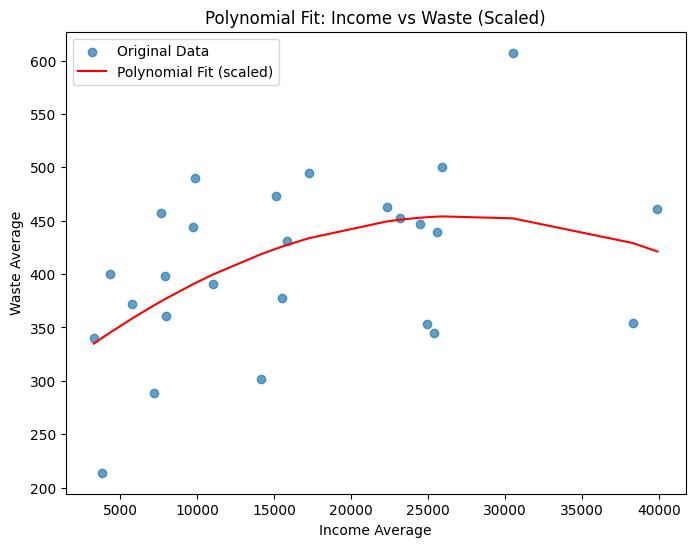

In [70]:
# Standardize the Income Average column
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cross_sect['Income Average'].values.reshape(-1, 1))

# Fit the polynomial regression model on scaled data
X_poly_scaled = poly.fit_transform(X_scaled)
model = LinearRegression().fit(X_poly_scaled, cross_sect['Waste Average'])

# Predict using the scaled sorted data
X_scaled_sorted = scaler.transform(X_sorted)
X_poly_sorted_scaled = poly.transform(X_scaled_sorted)
y_pred_sorted = model.predict(X_poly_sorted_scaled)

# Plot the scaled polynomial fit
plt.figure(figsize=(8, 6))
plt.scatter(cross_sect['Income Average'], cross_sect['Waste Average'], alpha=0.7, label='Original Data')
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Fit (scaled)')
plt.title('Polynomial Fit: Income vs Waste (Scaled)')
plt.xlabel('Income Average')
plt.ylabel('Waste Average')
plt.legend()
plt.show()

In [74]:
r2 = r2_score(cross_sect['Waste Average'], y_pred)
print(f"R-squared for Polynomial Regression (Degree 2): {r2:.2f}")

R-squared for Polynomial Regression (Degree 2): -26.59


R-squared (Linear Fit): 0.1594
Slope (Coefficient): 0.0031
Intercept: 357.8728


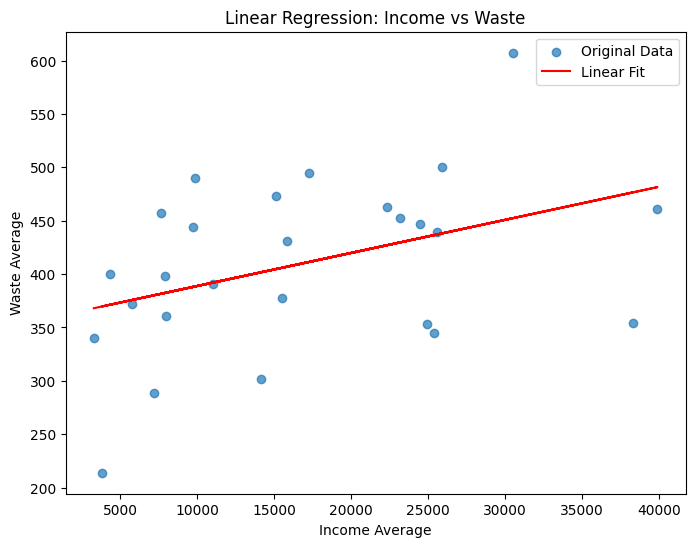

In [63]:
# Prepare the data
X = cross_sect['Income Average'].values.reshape(-1, 1)  # Independent variable
y = cross_sect['Waste Average']  # Dependent variable

# Fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict using the model
y_pred_linear = linear_model.predict(X)

# Calculate R²
r2_linear = r2_score(y, y_pred_linear)
print(f"R-squared (Linear Fit): {r2_linear:.4f}")

# Print coefficients
print(f"Slope (Coefficient): {linear_model.coef_[0]:.4f}")
print(f"Intercept: {linear_model.intercept_:.4f}")

# Plot the linear fit
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(cross_sect['Income Average'], cross_sect['Waste Average'], alpha=0.7, label='Original Data')
plt.plot(cross_sect['Income Average'], y_pred_linear, color='red', label='Linear Fit')
plt.title('Linear Regression: Income vs Waste')
plt.xlabel('Income Average')
plt.ylabel('Waste Average')
plt.legend()
plt.show()

In [64]:
# Prepare the data
X = cross_sect['Income Average']  # Independent variable
y = cross_sect['Waste Average']   # Dependent variable

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the OLS model
ols_model = sm.OLS(y, X).fit()

# Print the summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          Waste Average   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     4.550
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0433
Time:                        16:11:03   Log-Likelihood:                -148.37
No. Observations:                  26   AIC:                             300.7
Df Residuals:                      24   BIC:                             303.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            357.8728     28.550     12.

In [72]:
# Prepare the data
X = cross_sect['Income Average']
y = cross_sect['Waste Average']

# Create polynomial features (degree 2)
X_poly = np.column_stack((X, X**2))  # Add Income^2
X_poly = sm.add_constant(X_poly)     # Add constant (intercept)

# Fit the OLS model
ols_model_poly = sm.OLS(y, X_poly).fit()

# Print the summary
print(ols_model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:          Waste Average   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     3.674
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0413
Time:                        16:20:29   Log-Likelihood:                -147.03
No. Observations:                  26   AIC:                             300.1
Df Residuals:                      23   BIC:                             303.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        300.0561     45.808      6.550      0.0